### Flight - Can We Really Explain Them

#### Investigation Overview

> This dataset is from Bureau of Transportation Statistics. It tracks the on time performance of domestic flights operated by large air carriers. The dataset is for each year and can be downloaded directly from their website. The description is posted on their website in detail. 

#### Dataset Overview
> For this data analysis, we will be looking at data from the years 2007 and 2008.

### Importing libraries

In [2]:
# Import all packages and set plots to be embedded inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib.patches as mpatches
%matplotlib inline
import calendar

In [3]:
# Read CSV files from 2007 - 2008
df_Yr07 = pd.read_csv("2007.csv.bz2", encoding='latin-1', compression='bz2')
df_Yr08 = pd.read_csv("2008.csv.bz2", encoding='latin-1', compression='bz2')

In [4]:
#Append the four dataframes into a single source
df_05060708=df_Yr07.append([df_Yr08])

##### At first Glance this is how our raw data looks like

In [5]:
df_05060708.sample(30)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
874467,2007,2,7,3,1922.0,1850,2105.0,2027,US,924,...,7.0,19.0,0,NaN,0,17.0,0.0,6.0,0.0,15.0
1680305,2008,3,13,4,1900.0,1900,2119.0,2105,AA,1093,...,6.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
145753,2007,1,21,7,NaN,901,NaN,1005,YV,7047,...,0.0,0.0,1,B,0,0.0,0.0,0.0,0.0,0.0
6681532,2007,11,12,1,1633.0,1629,1809.0,1759,NW,1421,...,12.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
382482,2007,1,26,5,1603.0,1605,1652.0,1656,HA,262,...,5.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3840129,2007,7,2,1,815.0,825,1107.0,1112,YV,7203,...,8.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
586450,2007,1,31,3,829.0,830,1155.0,1150,CO,801,...,4.0,56.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3683340,2007,6,3,7,1633.0,1630,1732.0,1740,DL,1927,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3823677,2007,7,19,4,705.0,710,823.0,838,XE,3059,...,7.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
6683792,2007,11,20,2,1844.0,1849,1959.0,2018,NW,1536,...,9.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### Airline-wise cancellations
> In as much as there a canclellation, the analysis really doesnt show a lot of flight cancellation overtime.
> The cancellation are wise in the sense that they are due to serious condtions such as weather, security and carrier technical problems

>From the Bar on the next slide, we can see that 2007 had the most flights cancelled. But I am interested to know the cancellation causes. 

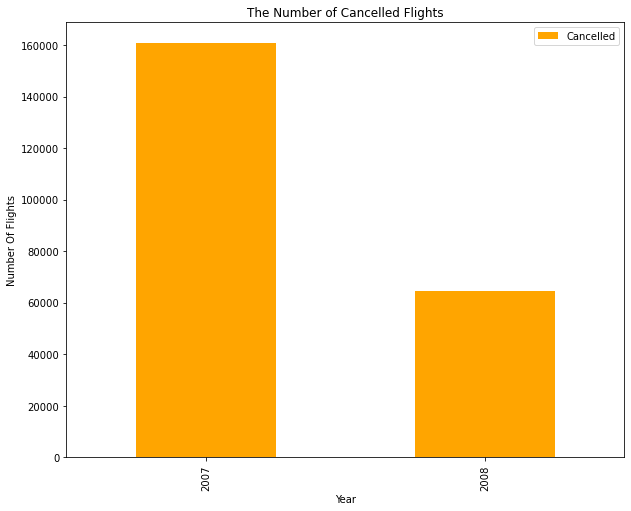

In [11]:
df_05060708_clean.groupby('Year', sort=False).sum()[['Cancelled']].plot.bar(figsize=(10,8), color='orange')
plt.title('The Number of Cancelled Flights');
plt.ylabel('Number Of Flights');

#### Below is a chart that looks at the proportion of Cancelled flights

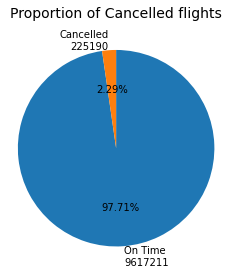

In [12]:
cancelled_flights = df_05060708_clean['Cancelled'].value_counts()
labels = f'On Time\n{cancelled_flights.values[0]}', f'Cancelled\n{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Cancelled flights\n', fontsize=14);

#### As mentioned in the previous slide
> The next slide gives us a glance of what we could call the major causes of the flight cancellation

>> It is evident from the graph above that "A" (Carrier) and "B" (Weather) account for the majority of flight cancellations. But "D" (security) is the least contributing to the cancellation. We have 92854 cancellation from Carrier and 87680 extreme weather. I am also interested to see which month had the most cancellations.

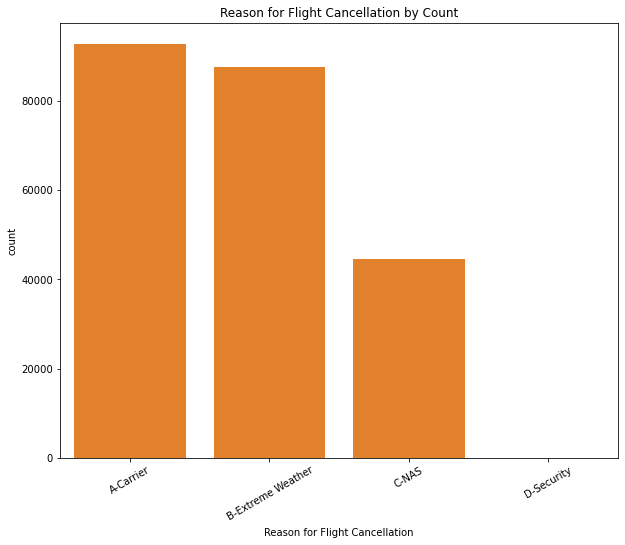

A    92854
B    87680
C    44612
D       45
Name: CancellationCode, dtype: int64

In [13]:
#Getting distribution using Seaborn bar plot 

#Define Plot
fig, ax = plt.subplots(figsize=(10,8))
base_color=sbn.color_palette()[1]
# Cancellation Codes:
#(A) Air Carrier; (B) Extreme Weather; (C) National Aviation System (NAS); and (D) Security.
sbn.countplot(data=df_05060708_clean,x='CancellationCode',color=base_color, order=['A','B','C','D'])
ax.set_xticklabels(['A-Carrier',' B-Extreme Weather','C-NAS','D-Security'], rotation = 30)
plt.title('Reason for Flight Cancellation by Count')
plt.xlabel('Reason for Flight Cancellation')

# Dsiplay the plot
plt.show()

# Get the actual number
actual_num = df_05060708_clean['CancellationCode'].value_counts()
actual_num

### U.S. Airports Ranked By Flight Cancellation Rates - 2007-2008
This ranking shows U.S. airports with the most and least percentage of flights canceled. This updated list is based on newly released data, which includes January through May of 2022. The above findings compare 2022 with the same time period in 2021.

The graph above demonstrates that the top three carriers for cancellations are MQ, AA, and OO. All four of these cancellations are included (A,B,C,D).

Text(0, 0.5, 'count')

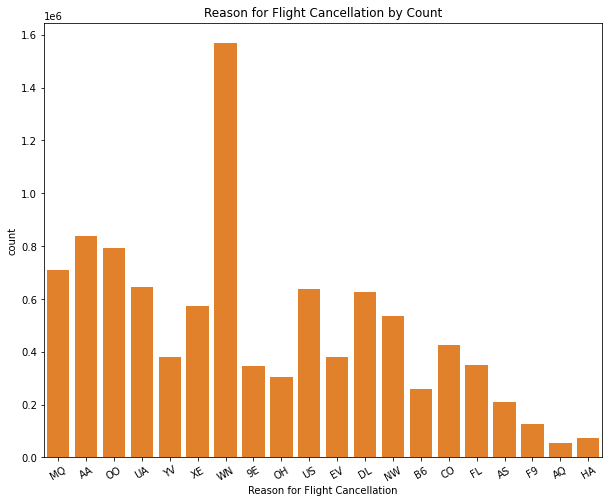

In [14]:
# Distribution of the carriers with the highest cancellation rates

# Acquiring a subset of the original dataframe that just includes the cancellation date
sub_canc = df_05060708_clean.query('CancellationCode in ["A","B","C","D"]')

# Saving value calculations for different carriers
cancellations=sub_canc.UniqueCarrier.value_counts()

#Define Plot
base_color=sbn.color_palette()[1]
plt.figure(figsize=(10,8))
g=sbn.countplot(data=df_05060708_clean,x='UniqueCarrier',color=base_color,order=cancellations.index)
g.set_xticklabels(labels=cancellations.index,rotation=30)
plt.title('Reason for Flight Cancellation by Count')
plt.xlabel('Reason for Flight Cancellation')
plt.ylabel('count')

#### Overal Distribution Delays. 
> Passengers should be aware that airlines do not guarantee their timetables when making travel arrangements. Although airlines strive to deliver passengers to their destinations on time, a number of factors can and occasionally do delay flights. Some challenges, such as inclement weather, air traffic delays, and technical problems, are difficult to anticipate and frequently out of the airlines' control.
>> The chats below shows delay distributions

In [19]:
# get delayed flights
delayed_flights = df_05060708_clean[df_05060708_clean['ArrDelay']>=15]

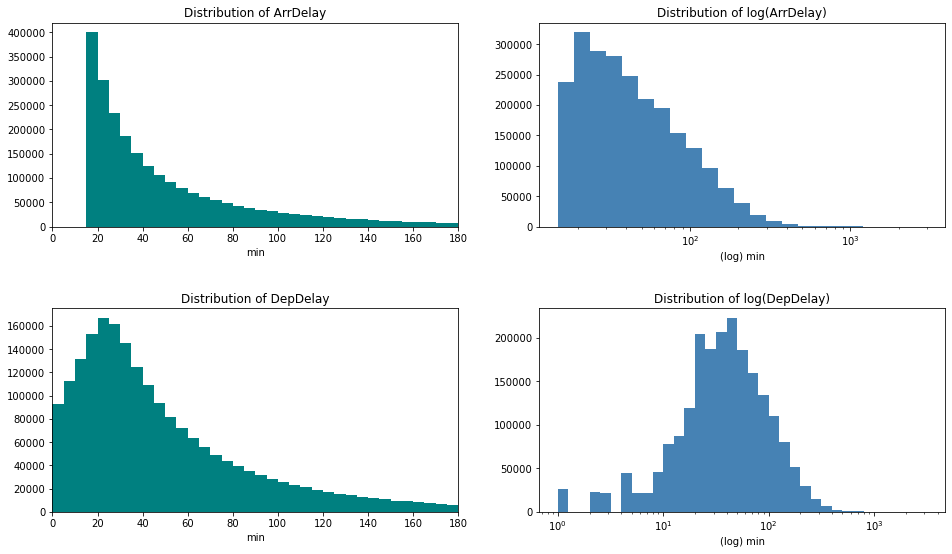

In [20]:
f, ax = plt.subplots(2, 2, figsize=(16, 9))
f.subplots_adjust(hspace=0.4)

for i, j in enumerate(['ArrDelay', 'DepDelay']):
    binsize=5
    data = delayed_flights[delayed_flights[j]>0]
    bin_edges = np.arange(0, data[j].max()+binsize, binsize)
    ax[i, 0].hist(data[j], bins = bin_edges, color='teal')
    ax[i, 0].set_xlabel('min');
    ax[i, 0].set_title(f'Distribution of {j}');
    ax[i, 0].set_xlim(0,180)

    # figure right
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[j].min()), np.log10(data[j].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = j, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    #ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('(log) min');
    ax[i, 1].set_title(f'Distribution of log({j})');

#### Lets talk about cancellation by month.
>According to the Bureau of Transportation Statistics of the Transportation Department, more over a quarter of commercial flights in the United States in January arrived late, were canceled, or were diverted, a modest increase from the same month in 2016. The outcomes were an improvement from December, a month that is typically busy for leisure travelers, when the 20 top airlines in the country experienced flight delays, cancellations, or diversions on over 36% of their flights.

>>The plot above for "B" demonstrates that the greatest cancellations occurred in the months of December, January, February, and March. Since "B" is cancellations due to weather, this may be the case, but we'll look at other scenarios later.

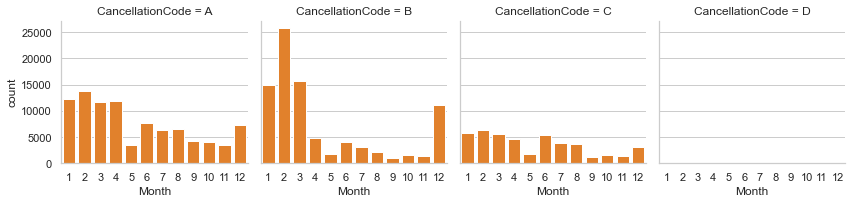

In [22]:
#Define plot
sbn.set_theme(style="whitegrid")
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sbn.FacetGrid(data=sub_canc,col='CancellationCode')
g.map(sbn.countplot,'Month',order=month_order, color=base_color)

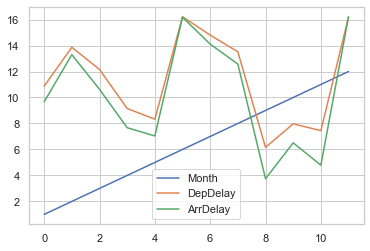

In [24]:
x = df_05060708_clean.groupby(['Month'], as_index=False).agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

 The worst months to fly were May and December, while September and November seem promising.

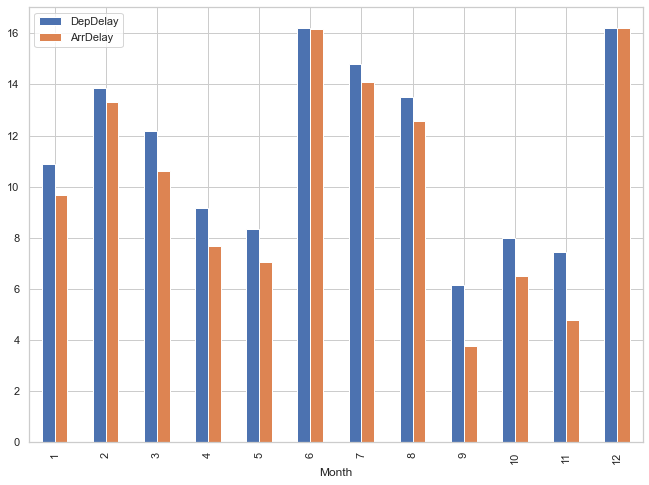

In [25]:
df_05060708_clean.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.rcParams["figure.figsize"] = (11,8)
plt.show()


##### Flights to destinations have an effect on arrival delays?
> Only in 2000, when more than 27% of flights were delayed or canceled, did travelers have more trouble arriving at their destinations on time. In 2007, when carriers ran approximately 7.5 million one-way trips, there were 31% fewer flights back then.

In [27]:
#Groups by destination and gets number of flights for each destination
group_destination = df_05060708.groupby('Dest').size().sort_values(ascending=False)
group_destination = group_destination.reset_index(name = 'NumberOfFlights')

#Group by destination and calculate the mean of arrival delay for each destination
group_arrdelay = df_05060708.groupby('Dest')['ArrDelay'].mean()
group_arrdelay = group_arrdelay.reset_index(name = 'AvgArrivalDelay')
#group_arrdelay

#merge the two dataframes into one on 'Dest'
Dest_delay = group_destination.merge(group_arrdelay,on='Dest')

Dest_delay['TopDest'] = np.nan

#Set Dest Ranking for every 20 records
Dest_delay.iloc[:20,3]='Rank 1-20'
Dest_delay.iloc[20:40,3]='Rank 21-40'
Dest_delay.iloc[40:60,3]='Rank 41-60'
Dest_delay.iloc[60:80,3]='Rank 61-80'
Dest_delay.iloc[80:100,3]='Rank 81-100'

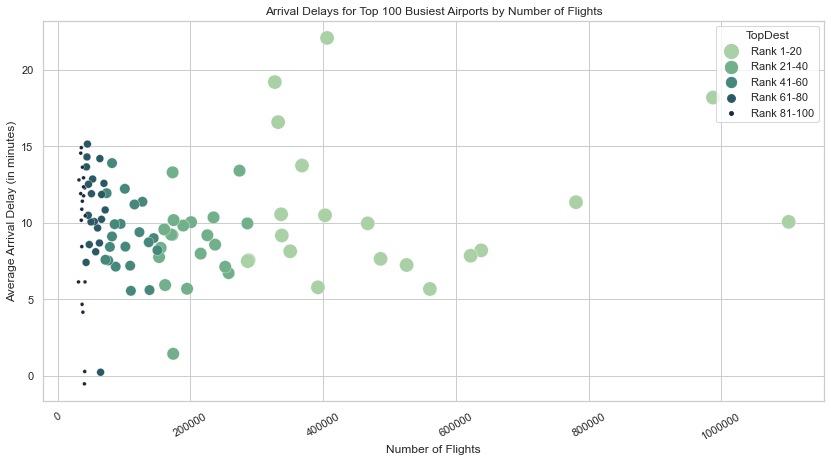

In [28]:
#Define plot
plt.figure(figsize = [14,7])
axes = sbn.scatterplot(data = Dest_delay, x = 'NumberOfFlights', y = 'AvgArrivalDelay',hue='TopDest', size="TopDest",  sizes=(15, 200) ,palette="ch:r=-.5,l=.75")
axes.set_xticklabels(['','0','200000','400000','600000','800000','1000000','1200000', '1400000'], rotation = 30)
plt.xlabel('Number of Flights');
plt.ylabel('Average Arrival Delay (in minutes)');
plt.title('Arrival Delays for Top 100 Busiest Airports by Number of Flights')

# Dsiplay the plot
plt.show();

> We continue to this trend overtime. According to the graph above, there is a correlation between the number of flights and the average arrival delay for the top 50 busiest destinations. This is less true for airports ranked 51–100 that have less traffic.

##### Finding the relation between delays and their Reasons
> We can see that there is a relationship between the carrier delay and the late aircraft delay, the nas delay and the carrier delay, as well as the weather delay and the carrier delay.

 > The results of multivariate analysis support the conclusion that delays were primarily caused by the weather. Additionally, it is clear that longer flights with greater distances generally arrive later than shorter flights.


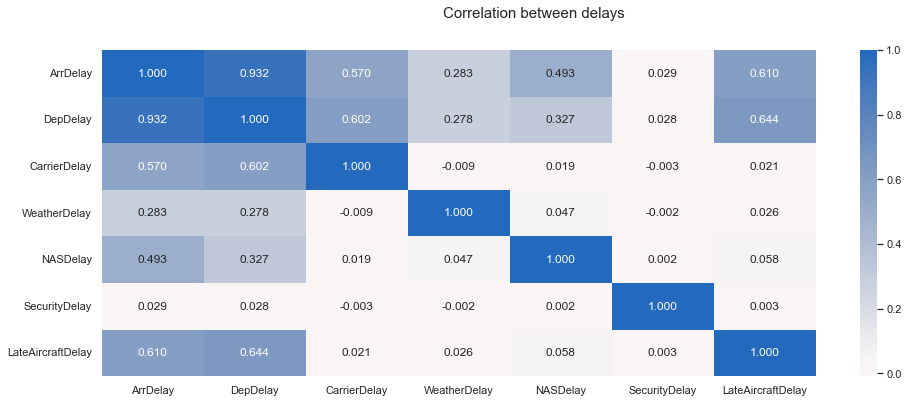

In [29]:
plt.figure(figsize=(16, 6))
sbn.heatmap(df_05060708_clean[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.suptitle('Correlation between delays', size=15);